# **`Web Server Logs Analysis`**

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading web server log file
data=pd.read_csv('weblog.csv')
data=pd.DataFrame(data)

In [ ]:
data.shape

(16007, 4)

# Data cleaning

In [ ]:
rename_col={'Staus':'Status'}
data.rename(columns=rename_col,inplace=True)

In [ ]:
data.head()

,IP,Time,URL,Status
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200


In [ ]:
data.isnull().sum()
data=data.dropna()
data.head()

,IP,Time,URL,Status
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200


# feature Engineering

In [ ]:
data.dtypes

IP        object
Time      object
URL       object
Status    object
dtype: object

In [ ]:
data['Time']=data['Time'].map(lambda x: x.lstrip('['))
data['new_Time']=data['Time'].str.split(':',n=1)
data['Date'] = data['new_Time'].str[0]
data['Time']=data['new_Time'].str[1]
data['Date'] = pd.to_datetime(data['Date'],format='%d%m%Y', errors='ignore')


In [ ]:
data['day']=data['Date'].str.slice(0,2)
data['Month']=data['Date'].str.slice(3,6)
data['Hour']=data['Time'].str.slice(0,2)

In [ ]:
data=data.drop(['new_Time'],axis=1)

In [ ]:
data.head()

,IP,Time,URL,Status,Date,day,Month,Hour
0,10.128.2.1,06:58:55,GET /login.php HTTP/1.1,200,29/Nov/2017,29,Nov,06
1,10.128.2.1,06:59:02,POST /process.php HTTP/1.1,302,29/Nov/2017,29,Nov,06
2,10.128.2.1,06:59:03,GET /home.php HTTP/1.1,200,29/Nov/2017,29,Nov,06
3,10.131.2.1,06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200,29/Nov/2017,29,Nov,06
4,10.130.2.1,06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,29/Nov/2017,29,Nov,06


# Exploratory data Analysis

**--- Maximum User Interaction hours**

In [ ]:
Most_hits_hours=data['Hour'].value_counts()

Text(0, 0.5, 'No of hits')

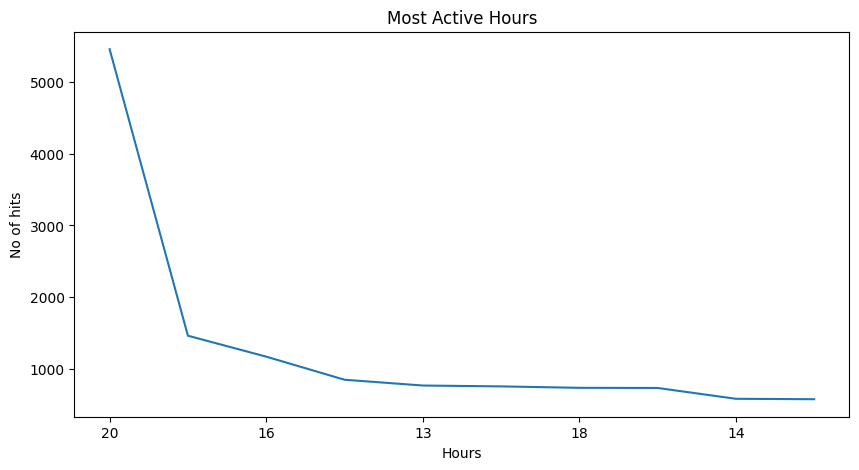

In [ ]:
plt.figure(figsize=(10,5))
Most_hits_hours[:10].plot()
plt.title('Most Active Hours')
plt.xlabel('Hours')
plt.ylabel('No of hits')

Text(0, 0.5, 'no of Hits')

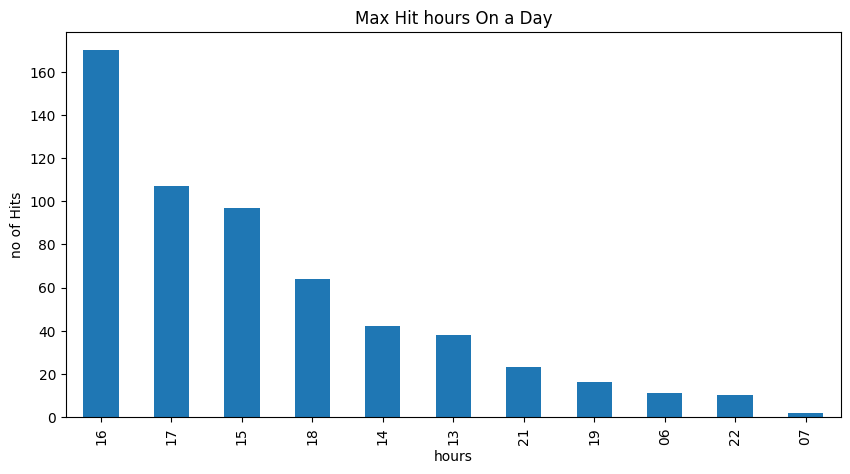

In [ ]:
plt.figure(figsize=(10,5))
df=data[data['Date']=='29/Nov/2017']
df['Hour'].value_counts().plot.bar()
plt.title('Max Hit hours On a Day')
plt.xlabel('hours')
plt.ylabel('no of Hits')



---



**-- Total hits per IP address ,thus, find the IP address with maximum hits**

In [ ]:
data['IP'].value_counts()

10.128.2.1    4257
10.131.0.1    4198
10.130.2.1    4056
10.129.2.1    1652
10.131.2.1    1626
chmod:          95
rm:             72
[Tue            17
sh:              7
[Thu             6
timeout:         5
[Wed             5
[Mon             5
a.out:           4
[Fri             1
[Sat             1
Name: IP, dtype: int64

In [ ]:
#Hits by IP addresses
IP_counts=data['IP'].value_counts()
IP_counts

10.128.2.1    4257
10.131.0.1    4198
10.130.2.1    4056
10.129.2.1    1652
10.131.2.1    1626
chmod:          95
rm:             72
[Tue            17
sh:              7
[Thu             6
timeout:         5
[Wed             5
[Mon             5
a.out:           4
[Fri             1
[Sat             1
Name: IP, dtype: int64

**--- Maximum hit by IP address**

In [ ]:

IP_max_hits=IP_counts.idxmax()
IP_max_hits

'10.128.2.1'

Text(0, 0.5, 'No of Hits')

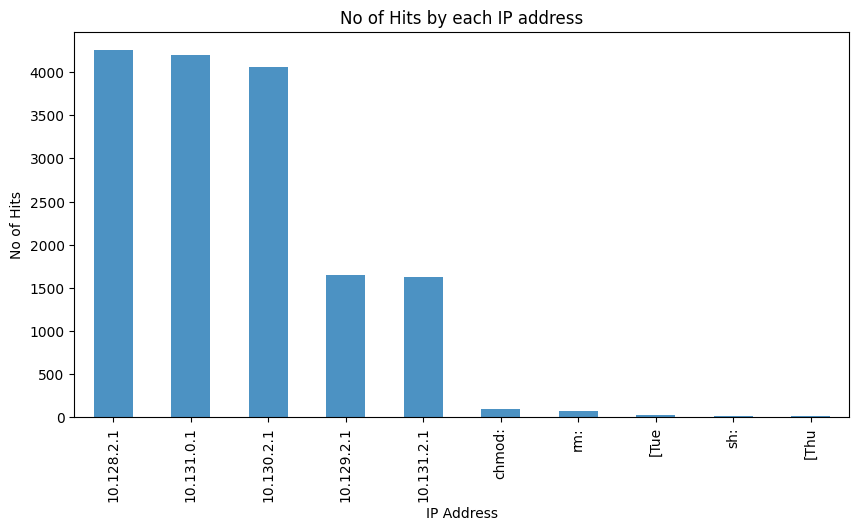

In [ ]:
plt.figure(figsize=(10,5))
IP_counts[:10].plot.bar(alpha=0.8)
plt.title('No of Hits by each IP address')
plt.xlabel('IP Address')
plt.ylabel('No of Hits')



---



**---Total hits per URL ,thus, find the URL with maximum hits**

In [ ]:
URL_count=data['URL'].value_counts()
URL_count

GET /login.php HTTP/1.1                                                         3284
GET /home.php HTTP/1.1                                                          2640
GET /js/vendor/modernizr-2.8.3.min.js HTTP/1.1                                  1415
GET / HTTP/1.1                                                                   861
GET /contestproblem.php?name=RUET%20OJ%20Server%20Testing%20Contest HTTP/1.1     467
                                                                                ... 
GET /profile.php?user=Shawon_ICT HTTP/1.1                                          1
GET /profile.php?user=st.zuhori HTTP/1.1                                           1
GET /contestproblem.php?name=ROJ%20Testing%20Contest%201 HTTP/1.1                  1
GET /edit.php?name=mahadi HTTP/1.1                                                 1
GET /fonts/fontawesome-webfont.woff2 HTTP/1.0                                      1
Name: URL, Length: 314, dtype: int64

In [ ]:
Max_hit_URL=URL_count.idxmax()
Max_hit_URL

'GET /login.php HTTP/1.1'

Text(0.5, 1.0, 'No of hits per URL')

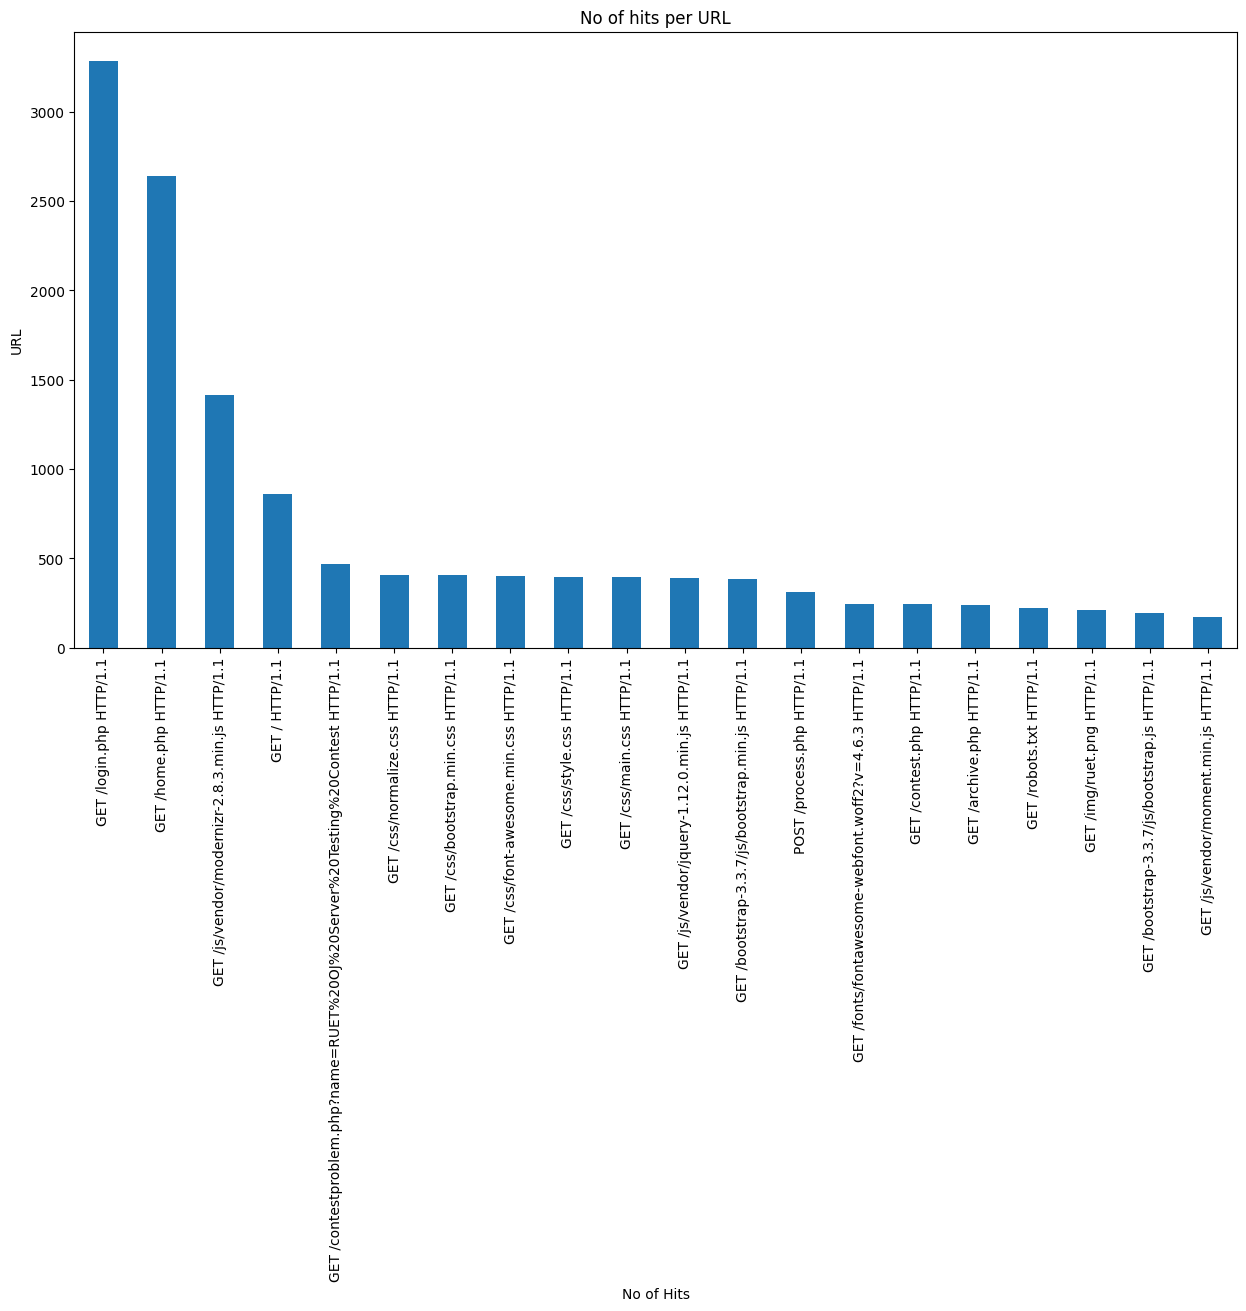

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
URL_count[:20].plot.bar()
plt.xlabel('No of Hits')
plt.ylabel('URL')
plt.title('No of hits per URL')



---



**--Status for each URL for every hit by the user**

In [ ]:
new=data['Status'].unique()
new

array(['200', '302', '304', '206', '404', 'No', 'dumped', 'Segmentation',
       'Assertion', 'Aborted', '2017]', 'found', '2018]'], dtype=object)

In [ ]:
status=data['Status'].value_counts()
status

200             11330
302              3498
304               658
404               251
No                167
206                52
2018]              28
2017]               7
dumped              5
Assertion           4
Aborted             4
found               2
Segmentation        1
Name: Status, dtype: int64

([<matplotlib.patches.Wedge at 0x7c83050b63b0>,
 [Text(-0.6682165635920884, 0.8737772165381636, '200'),
  Text(0.4500188439162041, -1.0037345466408554, '302'),
  Text(1.0393392748713883, -0.36024140754474177, '304'),
  Text(1.0867711311937804, -0.1700838275786128, '206'),
  Text(1.09705377808039, -0.08045500605644565, '404'),
  Text(1.0994976006742119, -0.033241933031213866, 'No'),
  Text(1.0998839902583577, -0.015975229993741444, 'dumped'),
  Text(1.0999677772766667, -0.008419557769246393, 'Segmentation'),
  Text(1.0999845560507868, -0.005828932128090472, 'Assertion'),
  Text(1.0999931360982107, -0.0038859409187121234, 'Aborted'),
  Text(1.0999978815728204, -0.002158827299168506, '2017]'),
  Text(1.099999661085336, -0.0008634883590790803, 'found'),
  Text(1.0999999788283858, -0.00021581832774343813, '2018]')])

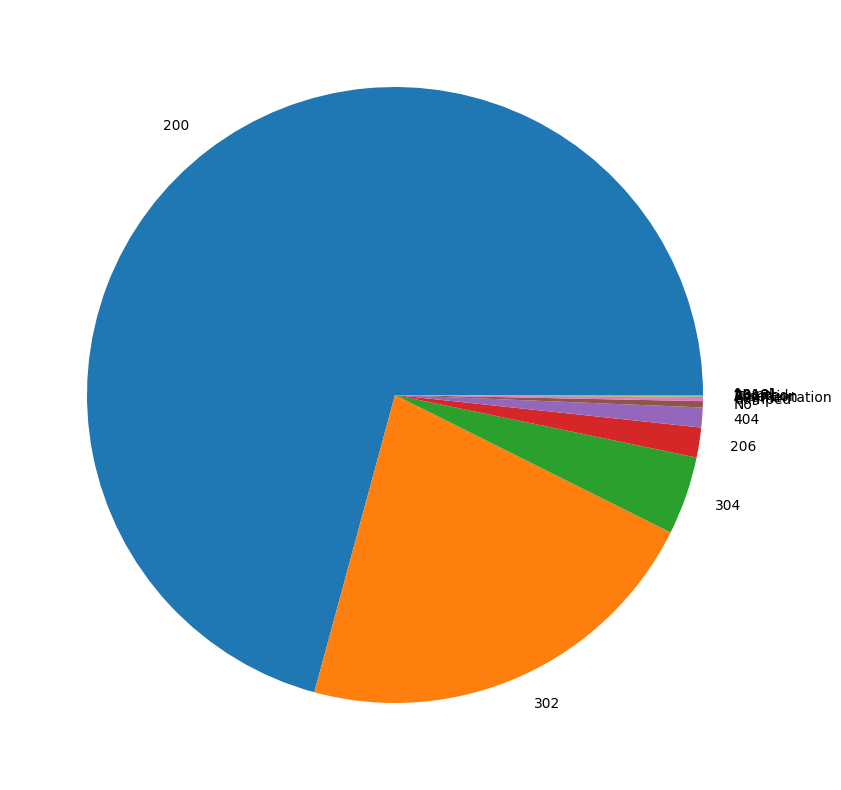

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(status,labels=new)

In [ ]:
status_URL=data.groupby('URL')['Status'].value_counts()
status_URL

URL                                     Status   
'*.o':                                  No           62
'a.out':                                No           41
'error.txt':                            No           64
00:53.4                                 2018]         1
02:49.8                                 2018]         5
                                                     ..
POST /profile.php?user=shawon HTTP/1.1  302           2
POST /update.php HTTP/1.1               200           7
command                                 dumped        5
main():                                 Assertion     4
not                                     found         2
Name: Status, Length: 358, dtype: int64

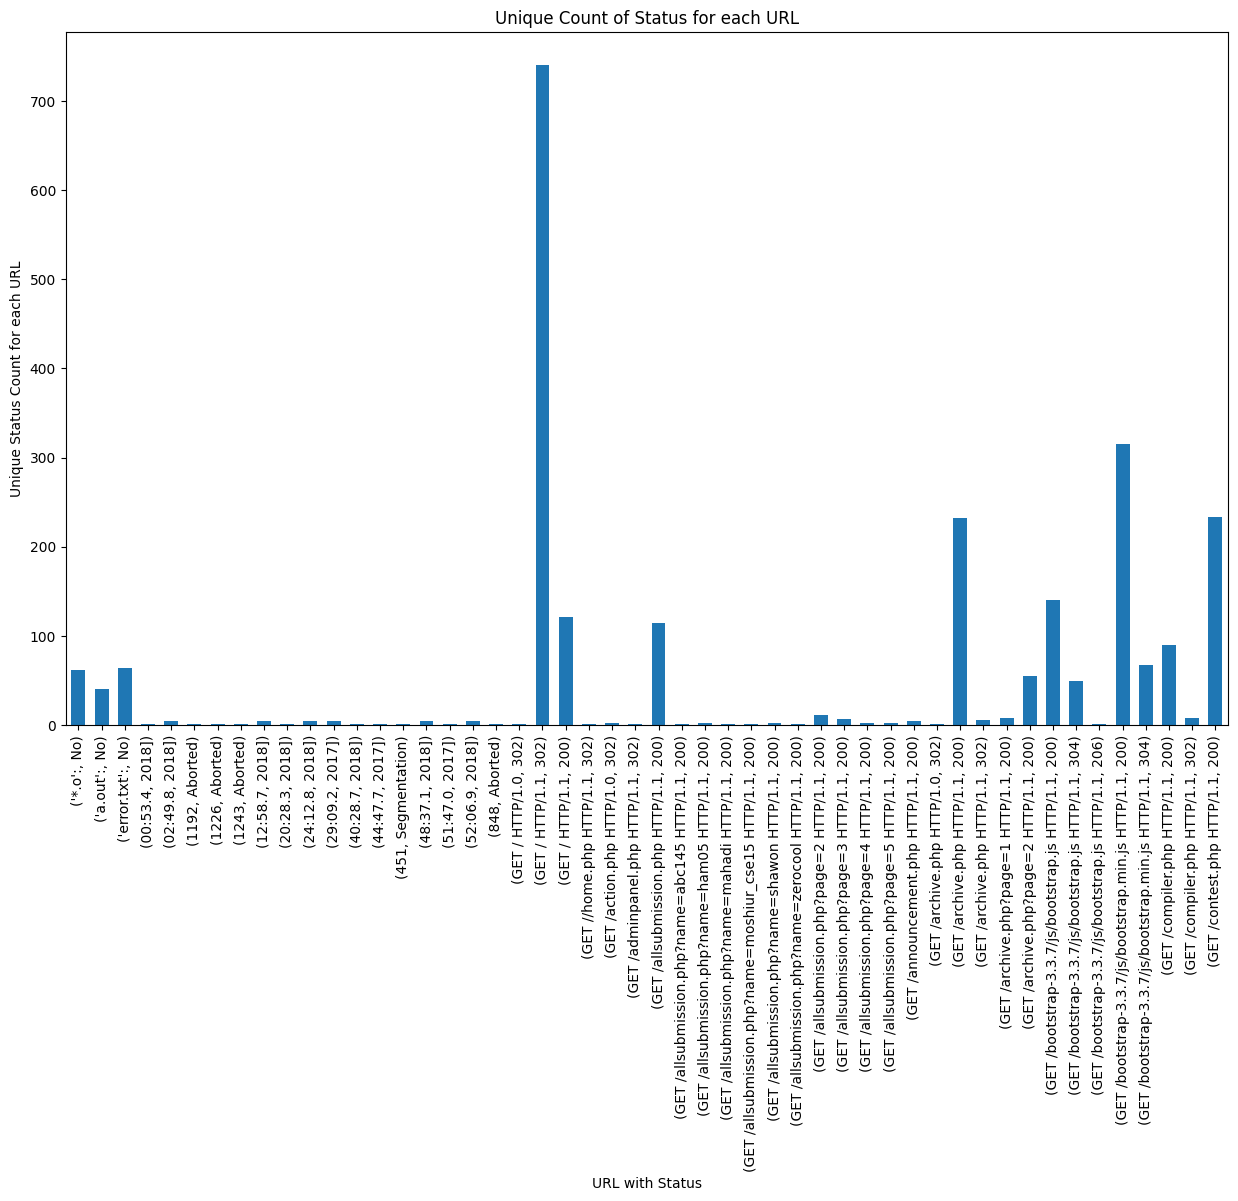

In [ ]:
plt.figure(figsize=(15, 9))
status_URL[:50].plot.bar(width=0.6)
plt.title('Unique Count of Status for each URL')
plt.xlabel('URL with Status')
plt.ylabel('Unique Status Count for each URL')
plt.show()



---



--**Most Active Months Observed**

In [ ]:
Active_months=data['Month'].value_counts()
Active_months

Nov    7254
Jan    5260
Dec    1929
Feb    1172
Mar     174
not     167
         42
e         5
n.c       4
Name: Month, dtype: int64

<Axes: >

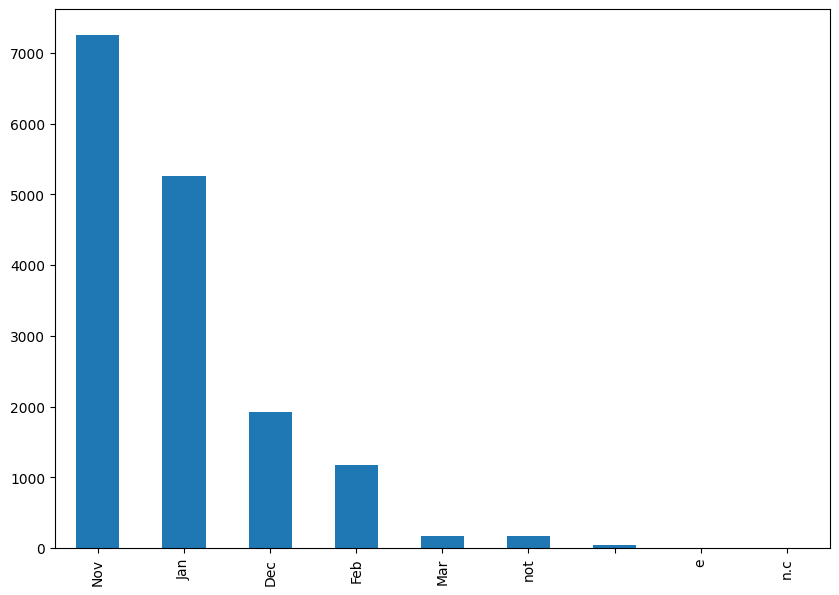

In [ ]:
plt.figure(figsize=(10, 7))
Active_months.plot.bar()

